 ![conjuntodedados.jpg](Downloads\Data science\Projeto cldf\Python-master\Gastos públicos dos deputados\03 - Dados de upload\conjuntodedados.jpg)
 
 Análise descritiva de Gastos públicos dos deputados da CLDF 
-----------------------------------------
#### @author: Luiz Eduardo 
### [Linkedin](www.linkedin.com/in/isweluiz)

------------------
Descrição: A transparência no trabalho dos governantes e das instituições e empresas públicas é obrigatória no Brasil. A Lei de Acesso à Informação - LAI, de 2011, garante o direito de solicitar e receber informações de órgãos públicos, de forma gratuita, para qualquer cidadão ou entidade. Esse acesso livre à informação permite que todos os cidadãos tenham a mesma capacidade de fiscalizar, monitorar, conhecer e discutir os gastos, as ações e as decisões das entidades.



> ### Índice
> Limpeza de Dados (Data Cleaning)

> Análise dos Dados (Data Analysis)

> Visualização dos Dados (Data Visualization)

> Conclusão


> ### Escopo da análise

> Extração dos dados da CLDF no link [Dados Abertos CLDF](dosabertos.cl.df.gov.br) 

> Anális dos dados (data analysis)

> Qual deputado que mais gastou? Em qual periódo do ano ele(a) mais gastou?

> Qual deputado que menos gastou neste período?

>Quais forncedores receberam os maiores valores?

## Cronograma apresentado na 1ª apresentação 
 > * Escolha da linguagem de programação 
 > * Extração, limpeza e análise dos dados 
 > * Análise descritiva dos dados. Apresentação dos dados em tabelas e gráficos


In [251]:
import random
from datetime import datetime
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt # Bibilioteca util para criar gráficos
import pandas as pd # Bibilioteca para auxiliar a criamos nossos dataframes
import numpy as np # Bibilioteca útil para realizar operações matemáticas
import seaborn as sns 
from collections import Counter

In [4]:
plt.style.use('ggplot') 
colors = [['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
          ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
          ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
          ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
          ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
          ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
          ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
         ]
#colors = ["red","green","blue","orange","purple","pink","yellow"]

In [5]:
verba2014 = pd.read_excel(r'Downloads\Data science\Projeto cldf\Python-master\Gastos públicos dos deputados\02 - Dados Preparadps\verba_indenizatoria_2014.xlsx')
verba2015 = pd.read_excel(r'Downloads\Data science\Projeto cldf\Python-master\Gastos públicos dos deputados\02 - Dados Preparadps\verba_indenizatoria_2015.xlsx')
verba2016 = pd.read_excel(r'Downloads\Data science\Projeto cldf\Python-master\Gastos públicos dos deputados\02 - Dados Preparadps\verba_indenizatoria_2016.xlsx')
verba2017 = pd.read_excel(r'verba_indenizatoria_2017_v2.xlsx')

## Previa dos dados
> ## Análise e organização dos dados

### Quais sao os problemas com essa importação?
> ### Valores vazios
> ### Valores com dados incorretos


In [6]:
verba2014.head(5)

,Gabinete,Nome,CPF,EMPRESA (OU PROFISSIONAL),CNPJ(ouCPF),Data de Emissão,NºDocumento,Valor,Unnamed: 8,Unnamed: 9
0,19,Deputado Robério Negreiros,696.291.101-72,PATRIMÔNIO GESTÃO CONDOMINIAL,37.136.934/0001-65,2013-12-24 00:00:00,3105,318.01,NaN,NaN
1,21,Deputado Chico Leite,317.640.021-72,"COND. ESCRITÓRIO PARLAMENTAR, LOJA 15- 1º SUBSOLO",01.225.747/0001-00,2013-12-13 00:00:00,10077,494.64,NaN,NaN
2,21,Deputado Chico Leite,317.640.021-72,"COND. ESCRITÓRIO PARLAMENTAR, LOJA 15- TÉRREO",01.225.747/0001-00,2013-12-13 00:00:00,10092,502.19,NaN,NaN
3,24,Deputada Luzia de Paula,182.811.251-87,POSTO MONUMENTAL,05.454.390/0001-93,2013-12-19 00:00:00,170745,180.73,NaN,NaN
4,24,Deputada Luzia de Paula,182.811.251-87,AUTO POSTO SÃO MATEUS LTDA.,07.870.568/0001-02,2013-12-12 00:00:00,41618,110.00,NaN,NaN


In [7]:
verba2014.head(5)

,Gabinete,Nome,CPF,EMPRESA (OU PROFISSIONAL),CNPJ(ouCPF),Data de Emissão,NºDocumento,Valor,Unnamed: 8,Unnamed: 9
0,19,Deputado Robério Negreiros,696.291.101-72,PATRIMÔNIO GESTÃO CONDOMINIAL,37.136.934/0001-65,2013-12-24 00:00:00,3105,318.01,NaN,NaN
1,21,Deputado Chico Leite,317.640.021-72,"COND. ESCRITÓRIO PARLAMENTAR, LOJA 15- 1º SUBSOLO",01.225.747/0001-00,2013-12-13 00:00:00,10077,494.64,NaN,NaN
2,21,Deputado Chico Leite,317.640.021-72,"COND. ESCRITÓRIO PARLAMENTAR, LOJA 15- TÉRREO",01.225.747/0001-00,2013-12-13 00:00:00,10092,502.19,NaN,NaN
3,24,Deputada Luzia de Paula,182.811.251-87,POSTO MONUMENTAL,05.454.390/0001-93,2013-12-19 00:00:00,170745,180.73,NaN,NaN
4,24,Deputada Luzia de Paula,182.811.251-87,AUTO POSTO SÃO MATEUS LTDA.,07.870.568/0001-02,2013-12-12 00:00:00,41618,110.00,NaN,NaN


In [8]:
verba2015.head(5)

,GAB,DEPUTADO,CPF,LOCAL,CNPJ,DATA,NUMERO,VALOR,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,16,Deputada Liliane Roriz,265.556.111/20,QUALITY ALUGUEL DE VEICULOS LTDA,72.653.009/0001/02,2015-02-04 00:00:00,000.025.140,6644.29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16,Deputada Liliane Roriz,265.556.111/20,PETRONORTE COMBUSTÍVEIS LTDA,06.071.706/0001/20,2015-01-30 00:00:00,3079,1548.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24,Deputada Luzia de Paula,182.811.251/87,AUTO POSTO NM 16 LTDA,11.948.180/0001/54,2015-01-23 00:00:00,019105,143.04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,Deputada Luzia de Paula,182.811.251/87,BR 070 COMERCIO DE DERIVADOS DE PETROLEO LTDA,38.053.450/0001/15,2015-01-10 00:00:00,233879,100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Deputada Luzia de Paula,182.811.251/87,BR 070 COMERCIO DE DERIVADO DE PETROLEO LTDA,38.053.450/0001/15,2015-01-21 00:00:00,234206,198.58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
verba2016.head(5)

,Gabinete,Nome,CPF,EMPRESA (OU PROFISSIONAL),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
0,16,Deputada Liliane Roriz,265.556.111-20,2M PRODUÇÃO DIGITAL E COMUNICAÇÃO LTDA ME,22.425.647/0001-06,2016-02-04,000.000 043,6000
1,24,Deputada Luzia de Paula,182.811.251-87,MARINHO & ADVOGADOS,14.633.138/0001-32,2016-01-29,0 153,8000
2,24,Deputada Luzia de Paula,182.811.251-87,POSTO QNO,00.805.827/0001-72,2016-01-14,120501,100
3,24,Deputada Luzia de Paula,182.811.251-87,POSTO COLINA,24.912.669/0001-18,NaT,354151,187.34
4,24,Deputada Luzia de Paula,182.811.251-87,POSTO DISBRAVE GUARA,00.543.213/0004-02,2016-01-27,468254,175.75


In [10]:
verba2017.head(5)

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Mês,Nº Documento,Valor
0,16,Deputada Liliane Roriz,265.556.111-20,ESTAÇÃO NEWS E PRESTAÇÃO DE SERVIÇOS LTDA - ME,04.428.949/0001-48,2017-01-23,1.0,90,500.0
1,16,Deputada Liliane Roriz,265.556.111-20,ASSOCIAÇÃO COMUNITÁRIA DOS MORADORES DAS QNM 1...,2559961000166,2017-02-01,2.0,88,500.0
2,16,Deputada Liliane Roriz,265.556.111-20,2M PRODUÇÃO DIGITAL E COMUNICAÇÃO LTDA ME,22425647000106,2017-02-06,2.0,89,6000.0
3,16,Deputada Liliane Roriz,265.556.111-20,JORNAL CORREIO DE SANTA MARIA,10902694000106,2017-01-25,1.0,207,500.0
4,16,Deputada Liliane Roriz,265.556.111-20,SATÉLITE NOTÍCIAS EVENTOS E PUBLICIDADES LTDA,06.237.055/0001-04,2017-02-28,2.0,45,500.0


In [ ]:
print("Linhas: ",verba2014.shape[0]) 
print("Colunas: ",verba2014.shape[1]) 


### Nossas primeiras avaliações e análises serão realizadas nos dados do ano de 2014, conforme avançamos iremos adicionar os demais anos. 



In [11]:
verba2014.columns

Index(['Gabinete', 'Nome', 'CPF', 'EMPRESA (OU PROFISSIONAL)', 'CNPJ(ouCPF)',
       'Data de Emissão', 'NºDocumento', 'Valor', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

#### Notamos que algumas variáveis(colunas) não são necessárias pois estão com valores nulos portanto, podemos remove-las 
#### São elas;  
 >'Unnamed: 8',
 >'Unnamed: 9']
#### Devemos também renomear o nome de algumas colunas como. 
 >'EMPRESA (OU PROFISSIONAL)',
 >'CNPJ(ouCPF)',
 >'Data de Emissão',

In [12]:
verba2014.drop(['Unnamed: 8', 'Unnamed: 9'], axis = 1 , inplace = True)

In [13]:
verba2014.columns

Index(['Gabinete', 'Nome', 'CPF', 'EMPRESA (OU PROFISSIONAL)', 'CNPJ(ouCPF)',
       'Data de Emissão', 'NºDocumento', 'Valor'],
      dtype='object')

In [14]:
verba2014.columns = ['Gabinete', 'Deputado', 'CPF', 'Fornecedor', 'CNPJ-CPF',
       'Data Emissão', 'NºDocumento', 'Valor']

#### Agora temos as colunas que precisamos em nosso dataset, esta é a faze de tratamento dos dados, poderiamos ter realizado esta etapa noo excel
#### Já que estamos trabalhando nas colunas, vamos criar uma coluna para contagem de ocorrências

In [15]:
verba2014['Contagem'] = 1

In [16]:
verba2014['Contagem'].head(5)

0    1
1    1
2    1
3    1
4    1
Name: Contagem, dtype: int64

#### Vamos verificar com que tipo de dados estamos lidando, quantidade de váriaveis, tipos de váriaveis e quantidade de linhas

In [17]:
print("Linhas: ",verba2014.shape[0]) 
print("Colunas: ",verba2014.shape[1]) 

Linhas:  2728
Colunas:  9


In [18]:
verba2014.dtypes

Gabinete          int64
Deputado         object
CPF              object
Fornecedor       object
CNPJ-CPF         object
Data Emissão     object
NºDocumento      object
Valor           float64
Contagem          int64
dtype: object

In [19]:
verba2014.describe() 

,Gabinete,Valor,Contagem
count,2728.000000,2728.000000,2728.0
mean,13.332111,1306.301620,1.0
std,6.920977,2523.885671,0.0
min,1.000000,12.990000,1.0
25%,7.000000,100.007500,1.0
50%,15.000000,155.480000,1.0
75%,19.000000,800.000000,1.0
max,24.000000,34650.000000,1.0


### Já entendemos o básico e o necessário para começar a realizar análises descritivas básicas em nossos dados, então vamos lá. 
> ### Quem são e quantos são deputados da CLDF de 2014? 

In [20]:
nome_deputado2014 = verba2014['Deputado'].unique()
list(nome_deputado2014)

['Deputado Robério Negreiros',
 'Deputado Chico Leite',
 'Deputada Luzia de Paula',
 'Deputada Celina Leão',
 'Deputada Liliane Roriz',
 'Deputado Agaciel Maia',
 'Deputado Cristiano Araújo',
 'Deputado Joe Valle',
 'Deputado Professor Israel',
 'Deputado Wasny de Roure',
 'Deputado Wellington Luiz',
 'Deputada Arlete Sampaio',
 'Deputada Eliana Pedrosa',
 'Deputado Ayton Gomes Martins',
 'Deputado Benedito Augusto Domingos',
 'Deputado Marcio Michel Alves',
 'Deputado Evandro Garla',
 'Deputado Olair Francisco',
 'Deputado Patrício',
 'Deputado Paulo Roriz',
 'Deputado Rôney Tanios Nemer',
 'Deputado Washington Mesquita',
 'Deputado Chico Vigilante',
 'Deputado Cláudio Abrantes',
 'Deputado Alírio Neto']

In [21]:
len(nome_deputado2014)

25

## Distribuição de Frequências de uma Variável 
#### Bom, sabemos o nome de cada deputado, quantos são, agora, podemos responder outra pergunta: 
> ####  Quantas vezes o deputado foi citado no documento, ou seja, com que frequência, registros ele tem nos dados durante todo o ano?

In [22]:
 verba2014.groupby('Deputado')['Contagem'].sum()


Deputado
Deputada Arlete Sampaio               324
Deputada Celina Leão                   32
Deputada Eliana Pedrosa                40
Deputada Liliane Roriz                 25
Deputada Luzia de Paula                37
Deputado Agaciel Maia                 147
Deputado Alírio Neto                   40
Deputado Ayton Gomes Martins           23
Deputado Benedito Augusto Domingos     58
Deputado Chico Leite                   35
Deputado Chico Vigilante               56
Deputado Cláudio Abrantes             200
Deputado Cristiano Araújo              88
Deputado Evandro Garla                 55
Deputado Joe Valle                     97
Deputado Marcio Michel Alves           77
Deputado Olair Francisco               55
Deputado Patrício                      12
Deputado Paulo Roriz                  217
Deputado Professor Israel             291
Deputado Robério Negreiros            120
Deputado Rôney Tanios Nemer           198
Deputado Washington Mesquita          108
Deputado Wasny de Roure  

#### Vamos "tentar" exibir esses dados de forma gráfica estatísca, cuja o objetivo é  de produzir, no investigar em geral, uma impressão mais rápida e viva de visualização dos dados.

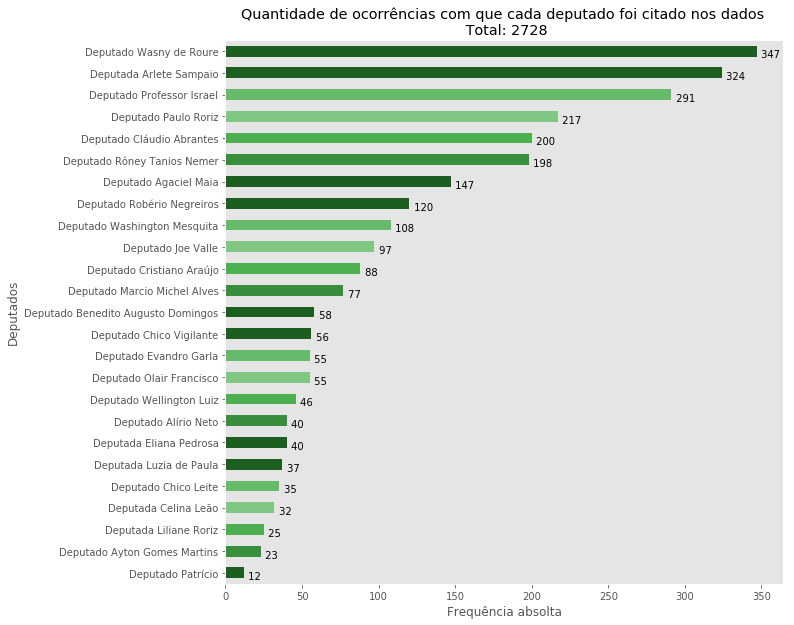

Figura 01
Gráfico de barras horizontais representando a frequência de ocorrência no dataset de cada deputado
 


In [232]:
contagem_ocorrencia2014 = verba2014.groupby('Deputado')['Contagem'].sum().sort_values().plot(kind = 'barh', color=random.choice(colors), grid= False, figsize=(10,10) )
for ix in contagem_ocorrencia2014.patches:
    ia=ix.get_bbox()
    contagem_ocorrencia2014.annotate("{: .0f}".format(ia.x1 + ia.x0), (ix.get_width() + 1 , ix.get_y() - 0.05))

plt.ylabel("Deputados")
plt.xlabel("Frequência absolta")
plt.title("Quantidade de ocorrências com que cada deputado foi citado nos dados \n Total: " + str(verba2014['Contagem'].sum()))
plt.show()

print("Figura 01")
print("Gráfico de barras horizontais representando a frequência de ocorrência no dataset de cada deputado")
print(" ")

* #### Na exibição do gráfico acima nós utilizamos uma váriavel DISCRETA cuja seu valor pode assumir apenas um número, de qualquer forma esse tipo frequência só faz sentido com valores inteiros. O resultado final é o resultado de uma contagem, o número de ocorrência em que cada deputado foi citado nos dados

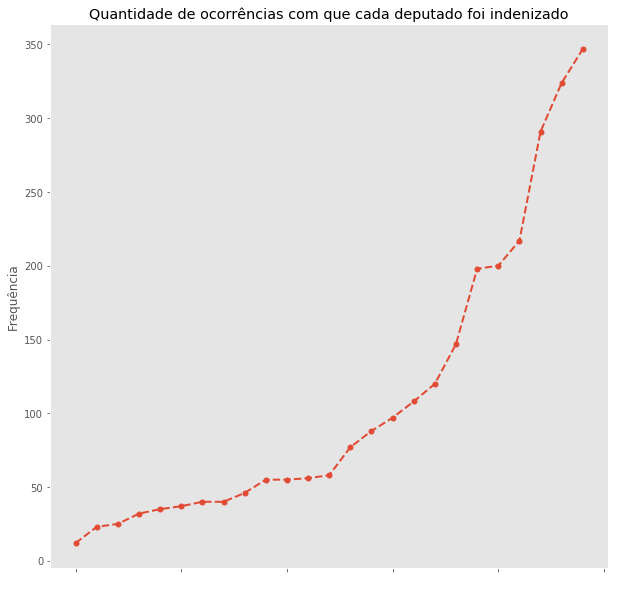

Gráfico em linha exibição da distribuição de frequência de ocorrência de uma váriavel
 


In [149]:
contagem_ocorrencia2014 = verba2014.groupby('Deputado')['Contagem'].sum().sort_values().plot( linestyle='dashed',grid= False, marker='.' ,figsize=(10,10), linewidth=2,  markersize=10)
plt.ylabel("Frequência")
plt.xlabel(" ")
plt.title("Quantidade de ocorrências com que cada deputado foi indenizado")
plt.show()
print("Gráfico em linha exibição da distribuição de frequência de ocorrência de uma váriavel")
print(" ")

###

In [25]:
descricoes_ocorrencia2014 = verba2014.groupby('Deputado')['Contagem'].sum()
analise_ocorrencia2014 = descricoes_ocorrencia2014.describe()
analise_ocorrencia2014

count     25.000000
mean     109.120000
std       98.365102
min       12.000000
25%       40.000000
50%       58.000000
75%      147.000000
max      347.000000
Name: Contagem, dtype: float64

Text(0.5,1,'Variações')

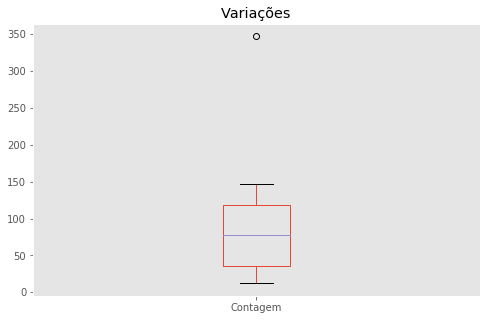

In [154]:
analise_ocorrencia2014.plot(kind = 'box' , figsize = (8,5) , grid = False)
plt.title("Variações")

#### Obtemos uma informação muito importante, sabemos quantas vezes cada deputado aparece no documento, essa informação será muito útil para podermos realizar comparações e aplicar frequências, vamos para a próxima pergunta.
> #### Qual o valor gasto por cada deputado durante o ano de 2014 por cada deputado? 

In [27]:
despesas_deputado2014 = {}

for i in nome_deputado2014:
    i_nome2014 = verba2014[verba2014['Deputado'] == i]
    total_gastos2014 = i_nome2014['Valor'].sum()
    despesas_deputado2014[i] = total_gastos2014
    gastos_por_deputados2014 = pd.DataFrame.from_dict(despesas_deputado2014, orient='index')
    gastos_por_deputados2014.columns = ['VALOR']
gastos_por_deputados2014.head(10)
print(gastos_por_deputados2014['VALOR'])

Deputado Robério Negreiros            227232.79
Deputado Chico Leite                   42689.29
Deputada Luzia de Paula                50648.38
Deputada Celina Leão                  158569.99
Deputada Liliane Roriz                110286.77
Deputado Agaciel Maia                  98637.83
Deputado Cristiano Araújo             179194.04
Deputado Joe Valle                    104993.57
Deputado Professor Israel             186207.62
Deputado Wasny de Roure               158823.78
Deputado Wellington Luiz              235393.00
Deputada Arlete Sampaio               164795.82
Deputada Eliana Pedrosa               178935.54
Deputado Ayton Gomes Martins          228000.00
Deputado Benedito Augusto Domingos    233888.42
Deputado Marcio Michel Alves          151113.08
Deputado Evandro Garla                 98992.93
Deputado Olair Francisco              134417.46
Deputado Patrício                      93982.60
Deputado Paulo Roriz                  232153.51
Deputado Rôney Tanios Nemer           11

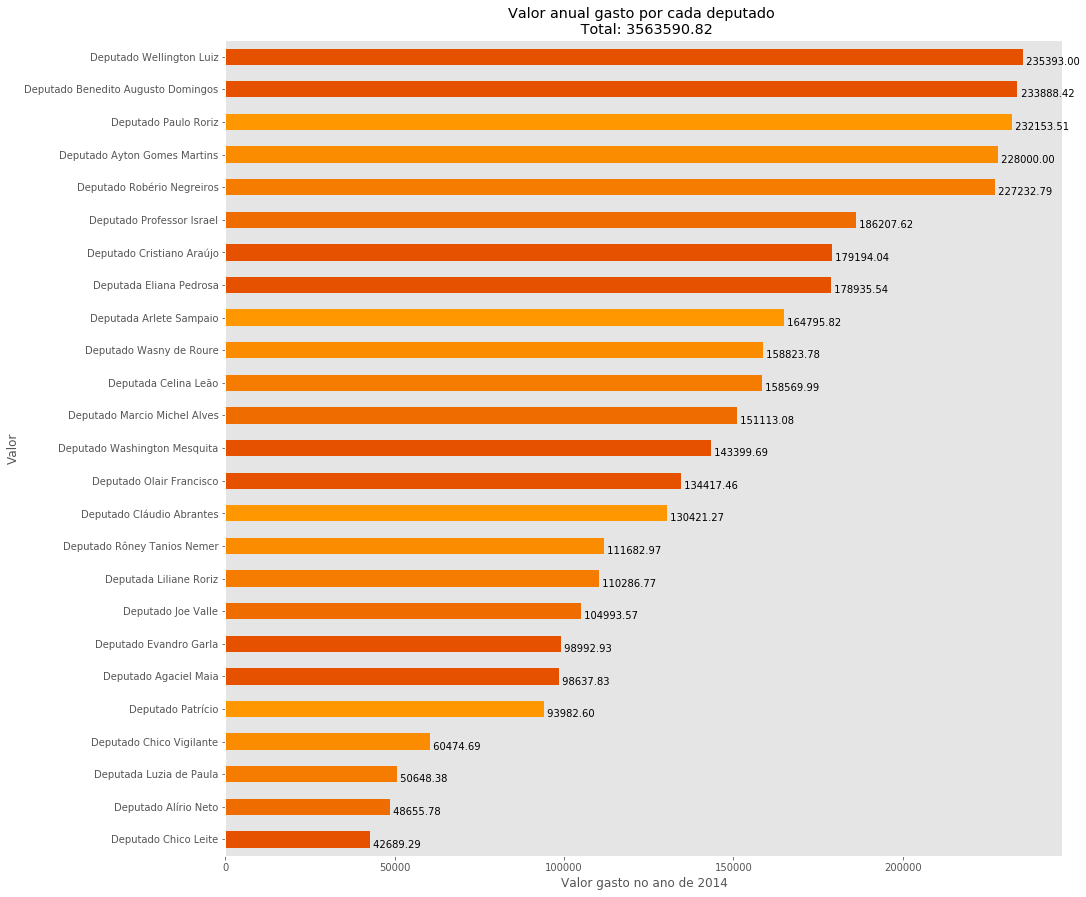

In [258]:
mensal_deputado2014 = verba2014.groupby('Deputado')['Valor'].sum().sort_values().plot(kind = 'barh', color=random.choice(colors), figsize=(15,15), grid = False)
for ix in mensal_deputado2014.patches:
    ia=ix.get_bbox()
    mensal_deputado2014.annotate("{: 0.2f}".format(ia.x1 + ia.x0), (ix.get_width() + 5, ix.get_y()) )

plt.title("Valor anual gasto por cada deputado \n Total: " + str(verba2014['Valor'].sum()))
plt.ylabel('Valor')
plt.xlabel('Valor gasto no ano de 2014')
plt.show()

#### Sabemos quanto cada deputado gastou, agora precisamos saber; 
> #### Quais foram os seus forncedores(empresa)?
> #### Com qual fornecedor ele mais gastou(empresa)?

In [28]:
gastos_fornecedor2014 = verba2014.groupby('Fornecedor')[['Deputado', 'Valor']].sum()
gastos_fornecedor2014.head

<bound method NDFrame.head of                                                        Valor
Fornecedor                                                  
 AUTO POSTO ESPLANADA LTDA                            150.00
 POSTO PETROBRAS AZUL                                 194.57
 VX ADVOCACIA E CONSULTORIA                          6500.00
ABC TRANSPORTES E TERCEIRIZAÇÃO DE MAO DE OBRA      27500.00
ABC TRANSPORTES E TERCEIRIZAÇÃO DE MAO DE OBRA ...   5500.00
ABC TRANSPORTES E TERCEIRIZAÇÃO DE MAO DE OBRA ...   5500.00
ABC TRANSPORTES E TERCEIRIZAÇÃO DE MAO DE OBRA ...   5500.00
ABC TRANSPORTES E TERCEIRIZAÇÃP DE MAO DE OBRA ...  22000.00
ADVOCACIA MARCIO SILVA                              52500.00
ADVOCACIA TAVARES E OLIVEIRA                        30000.00
ADVOCACIA TAVARES E OLIVEIRA S/C                    42000.00
AGENCIA DE VIAGENS NEW WORLD LTDA                     550.00
AGILE LOCADORA DE VEICULOS                          27500.00
AGILE LOCADORA DE VEICULOS LTDA                      65

In [34]:
plotagem_data = verba2014.copy()
#plotagem_data['Data Emissão'] = plotagem_data['Data Emissão'].apply(x)
#plotagem_data['Data Emissão'] = plotagem_data['Data Emissão']
datax = plotagem_data['Data Emissão']
datax.head(5)

0    2013-12-24 00:00:00
1    2013-12-13 00:00:00
2    2013-12-13 00:00:00
3    2013-12-19 00:00:00
4    2013-12-12 00:00:00
Name: Data Emissão, dtype: object

In [57]:
month = plotagem_data['Data Emissão'].values
month

array([datetime.datetime(2013, 12, 24, 0, 0),
       datetime.datetime(2013, 12, 13, 0, 0),
       datetime.datetime(2013, 12, 13, 0, 0), ...,
       datetime.datetime(2014, 12, 1, 0, 0),
       datetime.datetime(2014, 12, 4, 0, 0),
       datetime.datetime(2014, 12, 3, 0, 0)], dtype=object)

In [259]:
#month = [my_str.split("-")[1] for my_str in month]
#month.datetime("%m")
month1 = plotagem_data['Data Emissão']
#print(month1.split('-'), 1)
month2 = str(month1).strip()
month2.split('-')[1]
month2


mensal_deputado20144 = plotagem_data.groupby('Data Emissão').split('-')['Valor'].sum()
mensal_deputado20144.plot(kind = 'line' , title = 'Gastos por mês dos Deputados' , color = 'green', grid = True, figsize=(10,10))
plt.ylabel('Gasto em R$')
plt.xlabel('Mês')
plt.show()

AttributeError: 'DataFrameGroupBy' object has no attribute 'split'

In [89]:
#mes2014 = month2['Data Emissão'].values

mes2014 = [month2.split('-')[1] for x in month2]
#plotagem_data['Mês']= mes2014

In [32]:
verba2014.columns

Index(['Gabinete', 'Deputado', 'CPF', 'Fornecedor', 'CNPJ-CPF', 'Data Emissão',
       'NºDocumento', 'Valor', 'Contagem'],
      dtype='object')

In [333]:
plotagem_data1

datetime.datetime(2013, 12, 13, 0, 0)